#  Flights

### Load needed library

In [1]:
import pandas as pd
import numpy as np
import time

import warnings
warnings.filterwarnings('ignore')

### Import our Data

In [2]:
df = pd.read_csv('/kaggle/input/flights/flights.csv')

# Data Overview

In [3]:
df.head(100)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2013,1,1,746.0,746,0.0,1119.0,1129,-10.0,UA,1668,N24224,EWR,SFO,373.0,2565,7,46,2013-01-01T12:00:00Z
96,2013,1,1,749.0,710,39.0,939.0,850,49.0,MQ,3737,N508MQ,EWR,ORD,148.0,719,7,10,2013-01-01T12:00:00Z
97,2013,1,1,752.0,755,-3.0,1041.0,1059,-18.0,DL,2263,N325US,LGA,MCO,140.0,950,7,55,2013-01-01T12:00:00Z
98,2013,1,1,752.0,750,2.0,1025.0,1029,-4.0,UA,477,N511UA,LGA,DEN,249.0,1620,7,50,2013-01-01T12:00:00Z


In [4]:
df.shape

(336776, 19)

### know the number of columns and row of our dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [6]:
df.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object

### know the type of every column

In [7]:
df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


### Descriptive stats for our data

In [8]:
df.isna().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

### Check if there is missing data

In [9]:
df.duplicated().sum()

0

### we do not have any deuplicated rows 

In [10]:
df.nunique().to_frame().rename(columns={0:'Count'})

,Count
year,1
month,12
day,31
dep_time,1318
sched_dep_time,1021
dep_delay,527
arr_time,1411
sched_arr_time,1163
arr_delay,577
carrier,16


### check the uniqueness of our columns row

In [11]:
df['carrier'].unique()

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

### know how many carriers that we have in our dataset 

In [12]:
df['year'].unique()

array([2013])

In [13]:
df.day.describe()

count    336776.000000
mean         15.710787
std           8.768607
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: day, dtype: float64

In [14]:
print(df['carrier'].value_counts())

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64


In [15]:
print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines'])

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines']


### every airline and its frequency journies

# Data cleaning

### see the missing data

In [16]:
missing_data = df.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(df.shape[0]-missing_data['missing values'])/df.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,air_time,9430,97.199919
1,arr_delay,9430,97.199919
2,arr_time,8713,97.412820
3,dep_time,8255,97.548816
4,dep_delay,8255,97.548816
5,tailnum,2512,99.254104
6,year,0,100.000000
7,hour,0,100.000000
8,distance,0,100.000000
9,dest,0,100.000000


### we see that those columns (air_time, arr_delay, arr_time, dep_time,dep_delay) have some missing data that we must handel

In [17]:
df=df.dropna()

### remove any row with at least one missing value

In [18]:
df.isna().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

###  now no nulls

In [19]:
cols=["day","month","year"]
df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

### join the coulmns day month year  to one colmun to be the date of our data

### Setting the Frequency

In [20]:
df.set_index("date", inplace=True)
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
date,,,,,,,,,,,,,,,,,,,
1-1-2013,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1-1-2013,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
1-1-2013,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
1-1-2013,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
1-1-2013,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


### our data now sorted by the date

# Exploratory Data Analysis

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

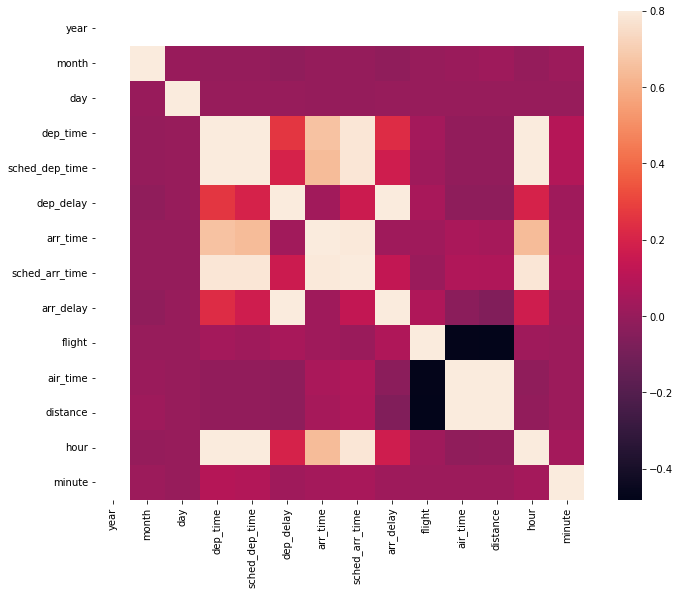

In [22]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

### this heatmap give us an intuation for the corrolation between our dataset columns which indicates that so coluns have very strong correlation like arrival time and departure time, other have so low correlation like arrival delay and distance.

Text(0.5, 0, 'Flight count')

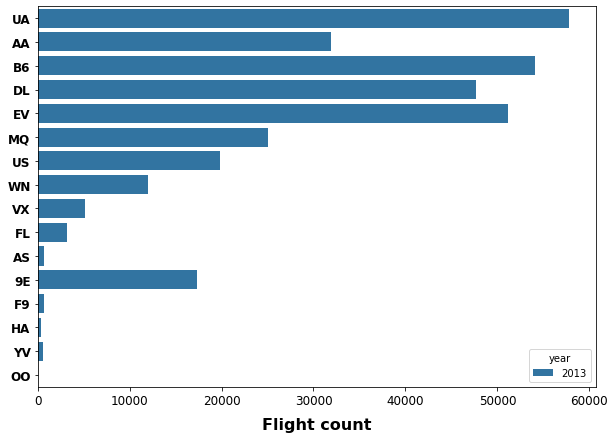

In [23]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="carrier", hue='year', data=df)

# Setting Labels
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)


### this count plot give us an observiation on which is the most airlines have made flights in 2013
### we find that it is UA and B6 have most flights for 2014 where is very low flights for OO(SKYWEST)

In [24]:
#Status  on time (0),
#slightly delayed (1),
#highly delayed (2),
for dataset in df:
    df.loc[df['arr_delay'] <= 10, 'Status'] = 0
    df.loc[df['arr_delay'] >= 10, 'Status'] = 1
    df.loc[df['arr_delay'] >= 30, 'Status'] = 2


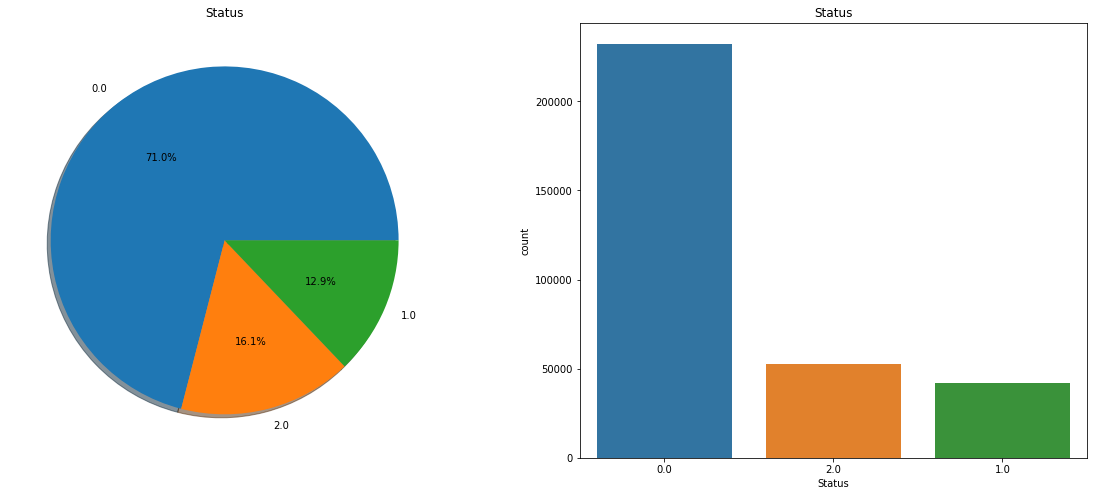

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df['Status'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = df['Status'].value_counts().index, data=df,ax=ax[1])
ax[1].set_title('Status')
plt.show()

### In 2013, a 71% of flights were delayed by more than 10 minutes. 12.9% of flights  had delays of more than 10 min and less than half hour.On the other hand,  16.6% above hour

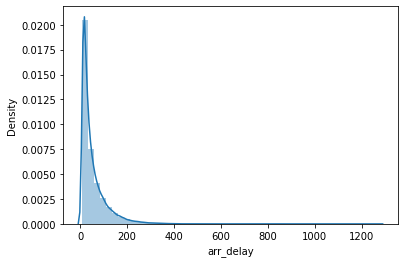

In [26]:
delay = df[(df.Status >= 1) &(df.Status < 3)]
#histogram
sns.distplot(delay['arr_delay'])
plt.show()

### It can be seen that delays are mostly located on the left side of the graph,The most of delays are short, and unusual we have very large delay

<Figure size 1440x576 with 0 Axes>

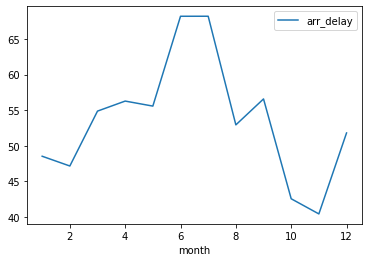

In [27]:
fig = plt.figure(figsize=(20,8))
delay[['month','arr_delay']].groupby(['month']).mean().plot()
plt.show()

### Delays focused on February, June and December, might the cause of the sumer and winter holidays 

<Figure size 1440x576 with 0 Axes>

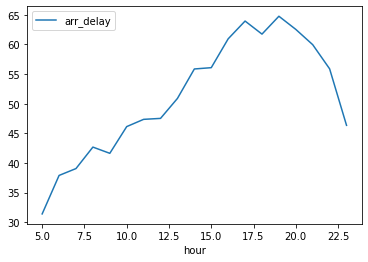

In [28]:
fig = plt.figure(figsize=(20,8))
delay[['hour','arr_delay']].groupby(['hour']).mean().plot()
plt.show()

### it is clear the the delays is rush between the 17:21 hour

In [29]:
carrier_delay = df[['hour','carrier']].groupby(['carrier']).head()
carrier_delay

,hour,carrier
date,,
1-1-2013,5,UA
1-1-2013,5,UA
1-1-2013,5,AA
1-1-2013,5,B6
1-1-2013,6,DL
...,...,...
30-1-2013,11,OO
3-11-2013,14,OO
10-11-2013,14,OO


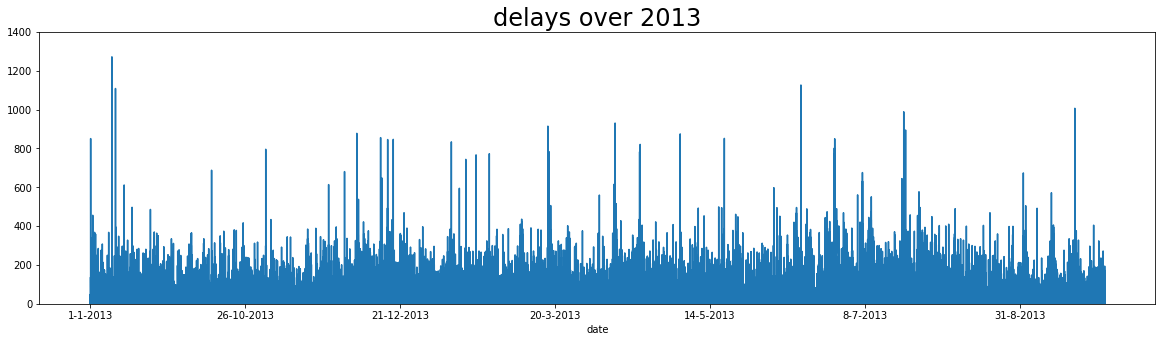

In [30]:
df.arr_delay.plot(figsize=(20,5))
plt.title("delays over 2013", size = 24)
plt.ylim(0,1400)
plt.show()

<AxesSubplot:xlabel='carrier', ylabel='arr_delay'>

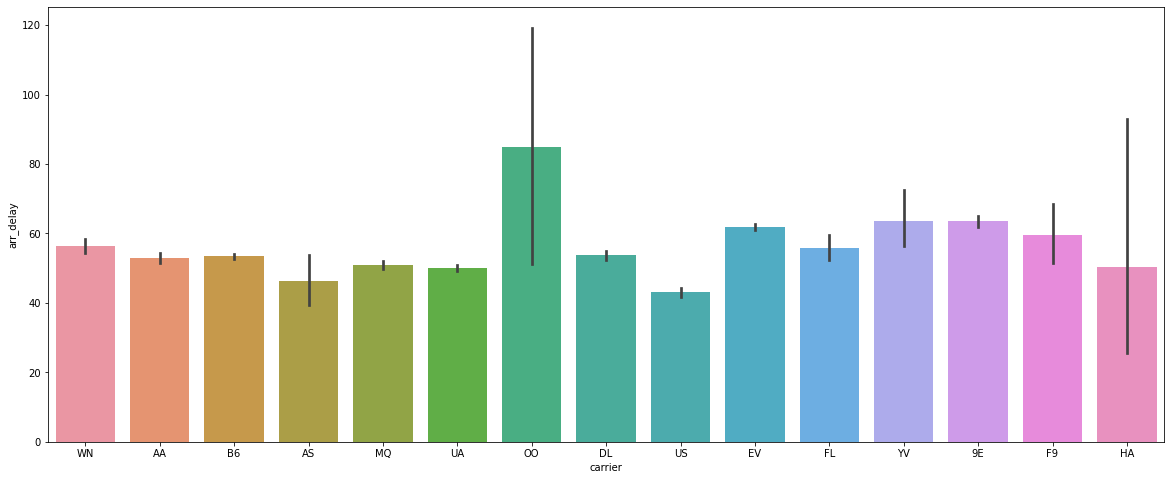

In [31]:
f,ax=plt.subplots(1,figsize=(20,8))
sns.barplot('carrier','arr_delay', data=delay,ax=ax, 
            order=['WN', 'AA','B6','AS', 'MQ',
                   'UA','OO','DL','US','EV','FL',
                   'YV', '9E','F9','HA'])


### We find the the Airlines 'OO: Skywest Airlines', 'YV: Mesa Airlines','9E: Pinnacle Airlines', and 'EV: Atlantic Southeast Airlines' have the most delays time along all the dataset. in other way the Airlines  'UA: United Airlines', 'AS: Alaska Airlines' have the least time delay over all carriers.



# Time series forecasting with  ARIMA models.


In [32]:
UA_delay = df.loc[df['carrier'] == 'UA', 'arr_delay']


### We sliced our data to make the model more accurate so i will take the UA airlines to detect the delays for it.the reason why i chose the UA airlines as we seen before from the visualization it is the most airlines have number of travels in the year so we intersited on it.

In [33]:
type(UA_delay)

pandas.core.series.Series

In [34]:
UA_delay = pd.DataFrame(UA_delay)
UA_delay.head()

,arr_delay
date,
1-1-2013,11.0
1-1-2013,20.0
1-1-2013,12.0
1-1-2013,7.0
1-1-2013,-14.0


In [35]:
UA_delay.shape

(57782, 1)

In [36]:
UA_delay=UA_delay.loc[['1-1-2013','2-1-2013','3-1-2013','4-1-2013','5-1-2013','6-1-2013','7-1-2013']]

### working on week of the UA airlines delays

### convert the data series of the UA Delay to datafram to workon it.

### Splitting the Data

In [37]:
from sklearn.model_selection import train_test_split
df, df_test = train_test_split(UA_delay, test_size=0.3, random_state=44, shuffle =True)

In [38]:
df.shape

(743, 1)

### 70% of the data will be for trianing and 30% for test

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:599: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:599: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
 This prob

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.12855D+00    |proj g|=  8.21602D-02

At iterate    5    f=  5.06066D+00    |proj g|=  1.82910D-02

At iterate   10    f=  4.89222D+00    |proj g|=  8.30121D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     21      1     0     0   9.313D-06   4.892D+00
  F =   4.8921275063457133     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<AxesSubplot:xlabel='date'>

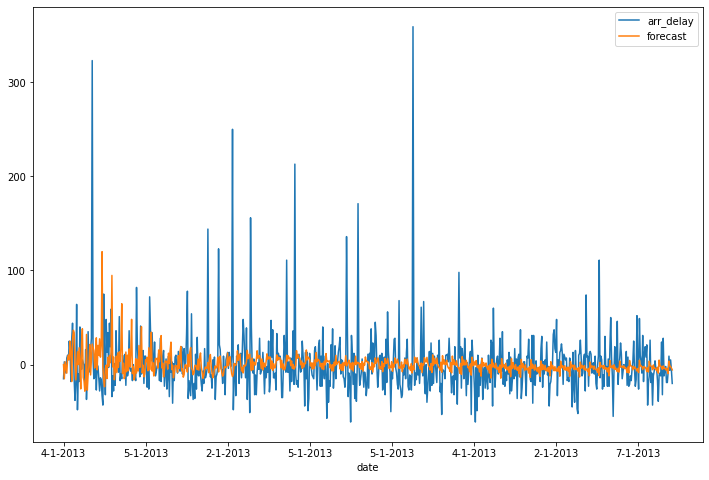

In [39]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df['arr_delay'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict()
df[['arr_delay','forecast']].plot(figsize=(12,8))

### the forcasting delay vs. actual delay

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          arr_delay   No. Observations:                  743
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3634.851
Date:                            Fri, 18 Feb 2022   AIC                           7279.701
Time:                                    21:46:26   BIC                           7302.667
Sample:                                         0   HQIC                          7288.562
                                            - 743                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0148      0.045     -0.330      0.742      -0.103       0.073
ma.L1         -0.9984      0.063    -15.767      0.000      -1.122      -0.874
ar.S.L12      -0.0272      0.030     -0.908      0.364      -0.086       0.032
ma.S.L12      -0.9989      0.694     -1.440      0.150      -2.359       0.361
sigma2      1138.2695    774.452      1.470      0.142    -379.629    2656.168
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             24336.35
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             3.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA

In [42]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

model2=sm.tsa.arima.ARIMA(df['arr_delay'],order=(1,1,1))
model_fit2=model2.fit()
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              arr_delay   No. Observations:                  743
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3665.792
Date:                Fri, 18 Feb 2022   AIC                           7337.584
Time:                        21:46:26   BIC                           7351.412
Sample:                             0   HQIC                          7342.915
                                - 743                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0141      0.044     -0.322      0.748      -0.100       0.072
ma.L1         -0.9951      0.007   -137.697      0.000      -1.009      -0.981
sigma2      1137.6104     18.973     59.959      0.000    1100.424    1174.797
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             39926.00
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             4.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

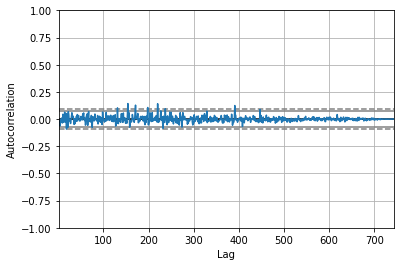

In [43]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['arr_delay'])
plt.show()

### Time Series forecasting is really useful when we have to take future decisions or we have to do analysis, we can quickly do that using ARIMA, there are lots of other Models from we can do the time series forecasting but ARIMA is really easy to understand.